In [332]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from scipy.stats import spearmanr

In [333]:

def ecdf_mv(data1,direction):
    
    ecdf = []
    if direction == 'positive':
        
        for row in data1:
           
            ecdf.append((row>=data1).all(1).mean())
        
    elif direction == 'negative':
        
        for row in data1:
            ecdf.append((row<=data1).all(1).mean())
    return np.asarray(ecdf)


# np.random.seed(0)
# data1 = np.random.randint(0, 1000, size=(1000, 5))
# test=ecdf_mv(data1,'positive')

In [462]:
data = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv').iloc[:,5:-1]
#data=data.sample(n=9000).reset_index(drop=True)

In [463]:
data.shape

(35064, 12)

In [464]:
data=data[~data['PM10'].isnull()].reset_index(drop=True)
data=data[~data['PM2.5'].isnull()].reset_index(drop=True)
data.drop(columns=['wd'],inplace=True)
data.drop(columns=['PM10'],inplace=True)

In [465]:
data['PM2.5'].max(),data['PM2.5'].min()

(823.0, 3.0)

In [466]:
data=data.fillna(0)

In [467]:
data.head(10)

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0
1,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,4.4
2,8.0,0.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,4.7
3,8.0,3.0,16.0,0.0,0.0,-0.7,1023.5,-20.9,0.0,2.6
4,8.0,3.0,0.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,2.5
5,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,2.0
6,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,2.3
7,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,2.0
8,3.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,2.7
9,3.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,2.9


In [468]:
data.shape

(34351, 10)

In [469]:
data.describe()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000,34351.000000
mean,84.926712,17.029612,55.087573,1337.889232,54.944510,13.724470,1010.978015,2.679928,0.063986,1.742042
std,85.620395,23.735404,36.043605,1227.842361,57.011396,11.378189,26.025324,13.725947,0.782399,1.204184
min,3.000000,0.000000,0.000000,0.000000,0.000000,-16.800000,0.000000,-35.300000,0.000000,0.000000
25%,23.000000,2.000000,27.000000,600.000000,7.000000,3.400000,1002.900000,-8.500000,0.000000,0.900000
50%,60.000000,7.140000,48.000000,1000.000000,41.000000,14.700000,1011.000000,3.300000,0.000000,1.400000
75%,116.000000,21.000000,77.000000,1700.000000,81.000000,23.400000,1020.000000,15.300000,0.000000,2.300000
max,823.000000,273.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [470]:
feature_list = ['SO2', 'NO2', 'CO', 'O3','TEMP', 'PRES', 'DEWP', 'RAIN','WSPM']
target = 'PM2.5'


In [471]:
corr_df=data[feature_list+[target]].corr()

In [472]:
pos_dir_var=[]
neg_dir_var=[]
for k,v in dict(corr_df.loc[target]).items():
    if v>0 and k!=target:
        pos_dir_var.append(k)
    else:
        if k!=target:
            neg_dir_var.append(k)
        
        

In [473]:
print(pos_dir_var ,neg_dir_var)
 


['SO2', 'NO2', 'CO', 'PRES', 'DEWP'] ['O3', 'TEMP', 'RAIN', 'WSPM']


In [474]:
data.head()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0
1,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,4.4
2,8.0,0.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,4.7
3,8.0,3.0,16.0,0.0,0.0,-0.7,1023.5,-20.9,0.0,2.6
4,8.0,3.0,0.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,2.5


In [475]:
def normalisation(input_df,pos_dir_var,neg_dir_var):
    
    length = input_df.shape[0]
    
    normalised_pos_list = []
    for i in pos_dir_var:
        temp = ecdf_mv(input_df[i].values.reshape(length,1),'positive')
        normalised_pos_list.append(list(temp))
    pos_dir_df = pd.DataFrame(normalised_pos_list).transpose()
    pos_dir_df.columns = pos_dir_var
    
    normalised_pos_list = []
    for i in neg_dir_var:
        temp = ecdf_mv(input_df[i].values.reshape(length,1),'negative')
        normalised_pos_list.append(list(temp))
    neg_dir_df = pd.DataFrame(normalised_pos_list).transpose()
    neg_dir_df.columns = neg_dir_var
    
    normalised_df = pd.concat([pos_dir_df,neg_dir_df], axis=1)
    #normalised_df[target]=input_df[target]
    return normalised_df
    
normalised_df=normalisation(data,pos_dir_var,neg_dir_var)
    

In [476]:
normalised_df.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115


In [477]:
# data1=neg_dir_df['WSPM']
# data2=input_['WSPM']
# coef, p = spearmanr(data1, data2)
# coef,p

In [478]:
# data1=pos_dir_df['DEWP']
# data2=input_['DEWP']
# coef, p = spearmanr(data1, data2)
# coef,p

In [479]:
normalised_df.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115


In [480]:
normalised_df.corr()*100

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM
SO2,100.000000,48.243810,55.622623,25.399652,-35.929847,20.157663,37.798617,14.959035,9.715085
NO2,48.243810,100.000000,73.509816,12.529143,0.448879,63.268170,27.980906,8.089121,53.694471
CO,55.622623,73.509816,100.000000,7.254304,10.595194,42.742570,21.207443,0.386078,43.224652
PRES,25.399652,12.529143,7.254304,100.000000,-77.446437,41.530226,82.956611,7.803574,-2.235699
DEWP,-35.929847,0.448879,10.595194,-77.446437,100.000000,-25.623535,-81.512474,-17.318721,21.711097
O3,20.157663,63.268170,42.742570,41.530226,-25.623535,100.000000,58.501074,0.057493,45.826638
TEMP,37.798617,27.980906,21.207443,82.956611,-81.512474,58.501074,100.000000,3.707923,13.402528
RAIN,14.959035,8.089121,0.386078,7.803574,-17.318721,0.057493,3.707923,100.000000,-0.244160
WSPM,9.715085,53.694471,43.224652,-2.235699,21.711097,45.826638,13.402528,-0.244160,100.000000


In [481]:
length,feature_count =normalised_df.shape[0], normalised_df.shape[1]
print(feature_count,length,data.shape[0],normalised_df.shape)
unweighted = ecdf_mv(normalised_df.values.reshape(length,feature_count),'positive')
print(unweighted.min(),unweighted.max())
normalised_df['unweighted_score'] = unweighted


9 34351 34351 (34351, 9)
2.911123402521033e-05 0.1620913510523711


In [482]:
normalised_df.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM,unweighted_score
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145,0.000902
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968,0.000524
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837,0.000029
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696,0.000029
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115,0.000029


In [483]:
def entropy_weight(df):
    from scipy.stats import entropy
    cols=list(df)
    entropy_list=[]
    for c in cols:
        temp=list(df[c])
        temp_entropy=entropy(pd.value_counts(temp))
        entropy_list.append(temp_entropy)
    normalizer=sum(entropy_list)
    entropy_values=[e/normalizer for e in entropy_list]
    return dict(zip(cols, entropy_values))

In [484]:
entropy_weight_dict = entropy_weight(normalised_df[pos_dir_var+neg_dir_var])

In [485]:
entropy_weight_dict

{'SO2': 0.09132843818061548,
 'NO2': 0.12494094477770655,
 'CO': 0.09034900641143875,
 'PRES': 0.15242759084849059,
 'DEWP': 0.1577590644556976,
 'O3': 0.12656805384897404,
 'TEMP': 0.15507538679360688,
 'RAIN': 0.007489553641558083,
 'WSPM': 0.09406196104191189}

In [486]:
def dependency_weight(df):
    cols = pos_dir_var+neg_dir_var
    coef_list = []
    unweighted = list(df['unweighted_score'])
    k=len(cols)
    for c in cols:
            temp=list(df[c])
            temp_coeff, _=spearmanr(temp, unweighted)
            coef_list.append(temp_coeff)
    normalizer=k-sum(coef_list)
    coeff_values=[(1-e)/normalizer for e in coef_list]
    return dict(zip(cols, coeff_values))

In [487]:
dependency_weight_dict = dependency_weight(normalised_df)

In [488]:
dependency_weight_dict

{'SO2': 0.12370032367032534,
 'NO2': 0.06215931991623452,
 'CO': 0.07604298995305639,
 'PRES': 0.11717297533681456,
 'DEWP': 0.2054012577386967,
 'O3': 0.07328184378523776,
 'TEMP': 0.11502332906149415,
 'RAIN': 0.13835147251696106,
 'WSPM': 0.08886648802117952}

In [489]:
def combined_weight_calculator(dependency_weight_dict, entropy_weight_dict):
    value = []
    feature_list = []
    for feature, dependency_weight in dependency_weight_dict.items():

        entropy_weight = entropy_weight_dict[feature]
        temp_weight = entropy_weight*dependency_weight
        value.append(temp_weight)
        feature_list.append(feature)
    normalizer=sum(value)
    combined_weights=[e/normalizer for e in value]
    return dict(zip(feature_list, combined_weights))

In [490]:
final_weights = combined_weight_calculator(dependency_weight_dict, entropy_weight_dict)

In [491]:
sum(final_weights.values()),sum(dependency_weight_dict.values()),sum(entropy_weight_dict.values())

(1.0, 1.0, 1.0)

In [606]:
list(final_weights.values())

[0.10023750703831188,
 0.0689071725648402,
 0.06095873636052296,
 0.15846904245958354,
 0.28750858083059583,
 0.08229508160689905,
 0.1582640212419518,
 0.009193758924576202,
 0.07416609897271856]

In [607]:
list(final_weights.keys())

['SO2', 'NO2', 'CO', 'PRES', 'DEWP', 'O3', 'TEMP', 'RAIN', 'WSPM']

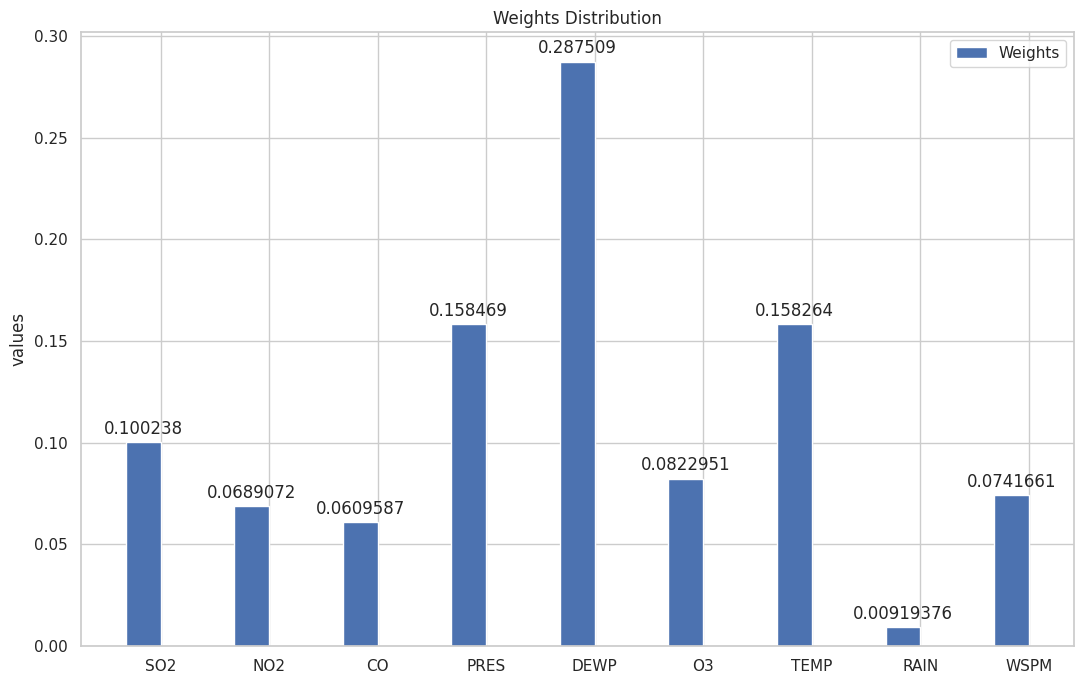

In [609]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,7)

labels = list(final_weights.keys())
weights = list(final_weights.values())


x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weights, width, label='Weights')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('values')
ax.set_title('Weights Distribution')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)


fig.tight_layout()

plt.show()

In [493]:
transformed_df = normalised_df.copy()

In [494]:
transformed_df.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM,unweighted_score
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145,0.000902
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968,0.000524
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837,0.000029
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696,0.000029
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115,0.000029


In [495]:
result=normalised_df.copy()

In [496]:
transformed_df = normalised_df.copy()
for feature, combined_weight in final_weights.items():
    transformed_df[feature] = transformed_df[feature]**combined_weight

WPM = transformed_df[pos_dir_var+neg_dir_var].apply(lambda row: np.prod(row), axis = 1)
result['WPM']=WPM

transformed_df = normalised_df.copy()
for feature, comined_weight in final_weights.items():
    transformed_df[feature] = transformed_df[feature]*comined_weight
WSM = transformed_df[pos_dir_var+neg_dir_var].apply(lambda row: np.sum(row), axis = 1)
result['WSM']=WSM


In [497]:
result.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM,unweighted_score,WPM,WSM
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145,0.000902,0.240185,0.398877
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968,0.000524,0.200316,0.381181
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837,0.000029,0.127993,0.337260
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696,0.000029,0.203681,0.430552
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115,0.000029,0.169900,0.393107


In [498]:
result.shape

(34351, 12)

In [499]:
data[target].shape

(34351,)

In [500]:
result[target]=data[target]

In [501]:
result.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM,unweighted_score,WPM,WSM,PM2.5
0,0.466246,0.132078,0.056621,0.796629,0.061134,0.358010,0.841780,1.0,0.322145,0.000902,0.240185,0.398877,9.0
1,0.499985,0.099153,0.056621,0.812989,0.057087,0.333731,0.857355,1.0,0.042968,0.000524,0.200316,0.381181,11.0
2,0.007045,0.120695,0.056621,0.817502,0.051876,0.377252,0.869727,1.0,0.032837,0.000029,0.127993,0.337260,8.0
3,0.323892,0.120695,0.025385,0.840296,0.038281,1.000000,0.872755,1.0,0.194696,0.000029,0.203681,0.430552,8.0
4,0.323892,0.009636,0.123927,0.857617,0.030829,0.533813,0.877471,1.0,0.211115,0.000029,0.169900,0.393107,8.0


In [502]:
Result_final=data.copy()
Result_final=Result_final[pos_dir_var+neg_dir_var]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Result_final = pd.DataFrame(scaler.fit_transform(Result_final), columns=Result_final.columns)

Result_final['PROD'] = Result_final[pos_dir_var+neg_dir_var].apply(lambda row: np.prod(row), axis = 1)
Result_final['MAX'] = Result_final[pos_dir_var+neg_dir_var].apply(lambda row: np.max(row), axis = 1)
Result_final['MIN'] = Result_final[pos_dir_var+neg_dir_var].apply(lambda row: np.min(row), axis = 1)
Result_final['SUM'] = Result_final[pos_dir_var+neg_dir_var].apply(lambda row: np.sum(row), axis = 1)

In [503]:
temp_res=result[['unweighted_score','WPM','WSM',target]]

Result_final = pd.concat([Result_final,temp_res], axis=1)

In [504]:
Res_check=Result_final.iloc[:,feature_count:]

In [505]:
Res_check.head()

,PROD,MAX,MIN,SUM,unweighted_score,WPM,WSM,PM2.5
0,0.0,0.980710,0.0,1.968920,0.000902,0.240185,0.398877,9.0
1,0.0,0.981190,0.0,2.142431,0.000524,0.200316,0.381181,11.0
2,0.0,0.981382,0.0,2.113144,0.000029,0.127993,0.337260,8.0
3,0.0,0.982246,0.0,1.760143,0.000029,0.203681,0.430552,8.0
4,0.0,0.982821,0.0,1.804545,0.000029,0.169900,0.393107,8.0


In [506]:
import numpy as np

def normalised_kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    n = len(values1)
    assert len(values2) == n, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(n), np.arange(n))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered / (n * (n - 1))


## spearman rho

In [507]:
sprearman_rho=[]
for col in list(Res_check)[:-1]:
    
    data1=list(Res_check[col])
    data2=list(Res_check[target])
    coef, p = spearmanr(data2,data1 )
    sprearman_rho.append(coef)
sprearman_rho=[round(x, 2) for x in sprearman_rho]
dict(zip(list(Res_check),sprearman_rho))

{'PROD': -0.03,
 'MAX': -0.07,
 'MIN': -0.03,
 'SUM': 0.42,
 'unweighted_score': 0.46,
 'WPM': 0.58,
 'WSM': 0.65}

In [508]:
# kendal_tau=[]
# for col in list(Res_check)[:-1]:

#     data1= list(Res_check[col])
#     data2= list(Res_check[target])
#     coef = normalised_kendall_tau_distance(data2,data1 )
#     kendal_tau.append(coef)
#     kendal_tau=[round(x, 2) for x in kendal_tau]
# dict(zip(list(Res_check), kendal_tau ))

## Kendal_tau 

In [509]:
from scipy.stats import kendalltau
kendal_tau=[]
for col in list(Res_check)[:-1]:

    data1= list(Res_check[col])
    data2= list(Res_check[target])
    tau,_ = kendalltau(data2,data1 )
    kendal_tau.append(tau)
kendal_tau=[round(x, 2) for x in kendal_tau]
dict(zip(list(Res_check), kendal_tau ))

{'PROD': -0.02,
 'MAX': -0.04,
 'MIN': -0.02,
 'SUM': 0.29,
 'unweighted_score': 0.32,
 'WPM': 0.41,
 'WSM': 0.46}

In [510]:
kendal_tau

[-0.02, -0.04, -0.02, 0.29, 0.32, 0.41, 0.46]

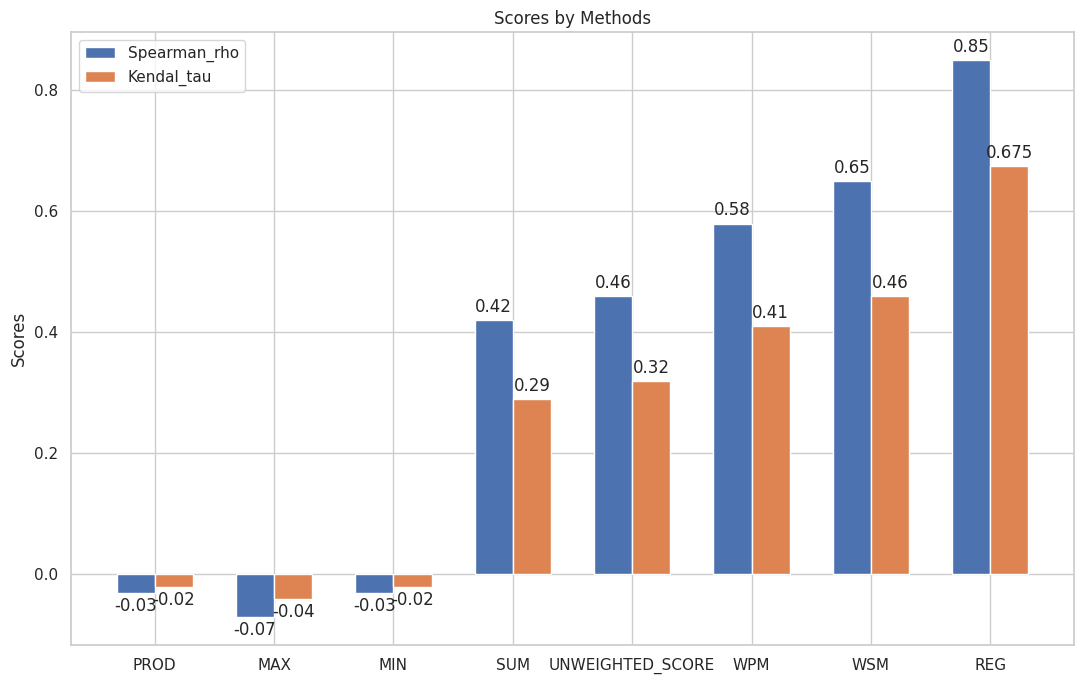

In [587]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,7)

labels = ['PROD', 'MAX', 'MIN', 'SUM', 'UNWEIGHTED_SCORE','WPM','WSM','REG']
Spearman_rho = sprearman_rho+[0.85]
Kendal_tau = kendal_tau+[0.675]

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Spearman_rho, width, label='Spearman_rho')
rects2 = ax.bar(x + width/2, Kendal_tau, width, label='Kendal_tau')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Methods')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [512]:
Result_final=data.copy()
Result_final=Result_final[pos_dir_var+neg_dir_var]
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# Result_final = pd.DataFrame(scaler.fit_transform(Result_final), columns=Result_final.columns)
Result_final['target']= data[target]

In [513]:
Result_final.head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM,target
0,6.0,17.0,200.0,1021.9,-19.0,62.0,0.3,0.0,2.0,9.0
1,7.0,14.0,200.0,1022.4,-19.3,66.0,-0.1,0.0,4.4,11.0
2,0.0,16.0,200.0,1022.6,-19.7,59.0,-0.6,0.0,4.7,8.0
3,3.0,16.0,0.0,1023.5,-20.9,0.0,-0.7,0.0,2.6,8.0
4,3.0,0.0,300.0,1024.1,-21.7,36.0,-0.9,0.0,2.5,8.0


In [523]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [524]:
X = Result_final[pos_dir_var+neg_dir_var].values
y = Result_final['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=40)
print(X_train.shape); print(X_test.shape)

(13740, 9)
(20611, 9)


In [526]:
X

array([[ 6.00e+00,  1.70e+01,  2.00e+02, ...,  3.00e-01,  0.00e+00,
         2.00e+00],
       [ 7.00e+00,  1.40e+01,  2.00e+02, ..., -1.00e-01,  0.00e+00,
         4.40e+00],
       [ 0.00e+00,  1.60e+01,  2.00e+02, ..., -6.00e-01,  0.00e+00,
         4.70e+00],
       ...,
       [ 4.00e+00,  3.80e+01,  5.00e+02, ...,  1.08e+01,  0.00e+00,
         1.10e+00],
       [ 4.00e+00,  3.00e+01,  4.00e+02, ...,  1.05e+01,  0.00e+00,
         1.20e+00],
       [ 4.00e+00,  3.80e+01,  6.00e+02, ...,  8.60e+00,  0.00e+00,
         1.30e+00]])

In [527]:
Result_final[pos_dir_var+neg_dir_var].head()

,SO2,NO2,CO,PRES,DEWP,O3,TEMP,RAIN,WSPM
0,6.0,17.0,200.0,1021.9,-19.0,62.0,0.3,0.0,2.0
1,7.0,14.0,200.0,1022.4,-19.3,66.0,-0.1,0.0,4.4
2,0.0,16.0,200.0,1022.6,-19.7,59.0,-0.6,0.0,4.7
3,3.0,16.0,0.0,1023.5,-20.9,0.0,-0.7,0.0,2.6
4,3.0,0.0,300.0,1024.1,-21.7,36.0,-0.9,0.0,2.5


In [553]:
import numpy as np
from scipy.optimize import minimize 
from scipy.optimize import nnls 

#Define problem
A = Result_final[pos_dir_var+neg_dir_var].values

b = Result_final['target'].values

#Use nnls to get initial guess
x0, rnorm = nnls(A,b)

#Define minimisation function
def fn(x, A, b):
    return np.sum(np.square((A.dot(x) - b)))


#Define constraints and bounds
cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
bounds = [[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None]]

#Call minimisation subject to these values
minout = minimize(fn, x0, args=(A, b), method='SLSQP',bounds=bounds,constraints=cons)
x = minout.x

print(x,x.sum(),fn(x,A,b))

[0.35431406 0.43292374 0.04029498 0.         0.77788467 0.03902432
 0.         0.         0.        ] 1.644441774975026 83000971.90597379


In [555]:
minout.x

array([0.35431406, 0.43292374, 0.04029498, 0.        , 0.77788467,
       0.03902432, 0.        , 0.        , 0.        ])

In [596]:
X = Result_final[pos_dir_var+neg_dir_var].values
y = Result_final['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(24045, 9)
(10306, 9)


In [597]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)
coef, p = spearmanr(y_pred_nnls, y_test)
tau,_ = kendalltau(y_pred_nnls, y_test)

print(coef,tau)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_nnls)

NNLS R2 score 0.684653169194609
0.8548164338136613 0.6745341674220113


2304.2781091884676

In [598]:
reg_nnls.coef_.sum()

4.732891792355581

In [599]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)
coef, p = spearmanr(y_pred_nnls, y_test)
tau,_ = kendalltau(y_pred_nnls, y_test)
print(coef,tau)

OLS R2 score 0.6937353966952639
0.8548164338136613 0.6745341674220113


In [600]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_nnls)

2304.2781091884676

In [602]:
np.sqrt(2304)

48.0